## Objective: Analyze data related to Entertainment.

#### Entertainment can be anything that provides enjoyment and amusement. So here we consider the field which entertained us the most, during the difficult days of the Covid-19 lockdowns – The Movies. Since the movie theatres were shut down and Television channels were helplessly re-telecasting episodes of old shows, we were forced to seek new forms of digital entertainment. This triggered the sudden boom in OTT(Over-the-Top) platforms both in terms of viewership and the quantity of the content. The significance of OTT platforms ,as a form of entertainment, in the current scenario motivated us to choose the data related to Movies on the top OTT platforms - Netflix, Hulu, Prime video and Disney +.

#### The dataset contains the following columns:
#### Title: The Title of the Movie
#### Year: The Year in which the Movie was released
#### Age: Age Required for watching the movie
#### IMDb: The IMDb Score of the Movie (out of 10)
#### Rotten Tomatoes: The Rotten Tomatoes Score of the Movie (out of 100)
#### Netflix: Whether the movie is present on Netflix or not (1 for True, 0 for False)
#### Hulu: Whether the movie is present on Hulu or not (1 for True, 0 for False)
#### Prime Video: Whether the movie is present on Prime Video or not (1 for True, 0 for False)
#### Disney+: Whether the movie is present on Disney+ or not (1 for True, 0 for False)
#### Directors: Director(s) of the Movie
#### Genres: Genres of the Movies
#### Country: Countries in which the movie was directed
#### Language: Language(s) in which the movie is available

# Reading data

In [1]:
import pandas as pd
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
Unnamed: 0         9515 non-null int64
ID                 9515 non-null int64
Title              9515 non-null object
Year               9515 non-null int64
Age                5338 non-null object
IMDb               9309 non-null object
Rotten Tomatoes    9508 non-null object
Netflix            9515 non-null int64
Hulu               9515 non-null int64
Prime Video        9515 non-null int64
Disney+            9515 non-null int64
Type               9515 non-null int64
Directors          9104 non-null object
Genres             9399 non-null object
Country            9261 non-null object
Language           9202 non-null object
Runtime            9196 non-null float64
dtypes: float64(1), int64(8), object(8)
memory usage: 1.2+ MB


In [3]:
df.isnull().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                4177
IMDb                206
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
Directors           411
Genres              116
Country             254
Language            313
Runtime             319
dtype: int64

In [4]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [5]:
df.isnull().sum()/len(df)*100

Unnamed: 0          0.000000
ID                  0.000000
Title               0.000000
Year                0.000000
Age                43.899107
IMDb                2.165003
Rotten Tomatoes     0.073568
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
Directors           4.319496
Genres              1.219128
Country             2.669469
Language            3.289543
Runtime             3.352601
dtype: float64

### Insights:
    1. There are 43% of null values in age.
    2. In column Genres,Directors,country,language,IMDb,Rotten Tomatoes and runtime also have a null values.


# Data Preprocessing

### 1.Missing Values

In [6]:
df['Age'] = df['Age'].replace('all','7')

In [7]:
df['Age'] = df['Age'].str.replace('+',' ')

In [8]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')

In [9]:
#Filling null values of Age
df['Age']=df['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
Unnamed: 0         9515 non-null int64
ID                 9515 non-null int64
Title              9515 non-null object
Year               9515 non-null int64
Age                9515 non-null float64
IMDb               9309 non-null object
Rotten Tomatoes    9508 non-null object
Netflix            9515 non-null int64
Hulu               9515 non-null int64
Prime Video        9515 non-null int64
Disney+            9515 non-null int64
Type               9515 non-null int64
Directors          9104 non-null object
Genres             9399 non-null object
Country            9261 non-null object
Language           9202 non-null object
Runtime            9196 non-null float64
dtypes: float64(2), int64(8), object(7)
memory usage: 1.2+ MB


In [10]:
import numpy as np
df['IMDb'] = df['IMDb'].str.replace('/10','').astype(np.float64)

In [11]:
#Filling null values of IMDb
df['IMDb']=df['IMDb'].fillna(df['IMDb'].mode())

In [12]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('/100','').astype(np.float64)

In [13]:
#Filling null values of Rotten Tomatoes
df['Rotten Tomatoes']=df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].mean())

### 2. Feature Reduction

In [14]:
df = df.dropna()

In [15]:
df = df.drop(['Type'], axis=1)
df.drop(columns="Unnamed: 0",inplace=True)

In [16]:
df.isnull().sum()

ID                 0
Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8695 entries, 0 to 9496
Data columns (total 15 columns):
ID                 8695 non-null int64
Title              8695 non-null object
Year               8695 non-null int64
Age                8695 non-null float64
IMDb               8695 non-null float64
Rotten Tomatoes    8695 non-null float64
Netflix            8695 non-null int64
Hulu               8695 non-null int64
Prime Video        8695 non-null int64
Disney+            8695 non-null int64
Directors          8695 non-null object
Genres             8695 non-null object
Country            8695 non-null object
Language           8695 non-null object
Runtime            8695 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.1+ MB


### 3. Encoding

In [18]:
df1=df.drop('Title',axis=1)

In [19]:
df1 = pd.concat([df1.drop('Genres', 1), df['Genres'].str.get_dummies(sep=",")], 1)

In [20]:
df1 = pd.concat([df1.drop('Language', 1), df['Language'].str.get_dummies(sep=",")], 1)

In [21]:
df1 = pd.concat([df1.drop('Country', 1), df['Country'].str.get_dummies(sep=",")], 1)

In [22]:
df1=df1.join(df[['Genres','Language','Country']],sort=False)

In [23]:
df1

,ID,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,...,United States,Uruguay,Venezuela,Vietnam,West Germany,Yugoslavia,Zimbabwe,Genres,Language,Country
0,1,2019,18.0,7.8,98.0,1,0,0,0,Martin Scorsese,...,1,0,0,0,0,0,0,"Biography,Crime,Drama","English,Italian,Latin,Spanish,German",United States
1,2,2016,7.0,8.4,97.0,1,0,0,0,Nitesh Tiwari,...,1,0,0,0,0,0,0,"Action,Biography,Drama,Sport","Hindi,English","India,United States,United Kingdom,Australia,K..."
2,3,2020,7.0,9.0,95.0,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",...,0,0,0,0,0,0,0,"Documentary,Biography",English,United Kingdom
3,4,2001,7.0,8.1,94.0,1,0,0,0,Ashutosh Gowariker,...,0,0,0,0,0,0,0,"Drama,Musical,Sport","Hindi,English","India,United Kingdom"
5,6,2018,13.0,7.1,94.0,1,0,0,0,Susan Johnson,...,1,0,0,0,0,0,0,"Comedy,Drama,Romance",English,United States
6,7,2020,13.0,7.6,93.0,1,0,0,0,Jeff Orlowski,...,1,0,0,0,0,0,0,"Documentary,Drama",English,United States
7,8,2017,13.0,7.3,92.0,1,0,0,0,Bong Joon Ho,...,1,0,0,0,0,0,0,"Action,Adventure,Drama,Sci-Fi","English,Korean,Spanish","South Korea,United States"
8,9,2018,16.0,7.3,92.0,1,0,0,0,"Ethan Coen,Joel Coen",...,1,0,0,0,0,0,0,"Comedy,Drama,Musical,Mystery,Romance,Western","English,French",United States
9,10,2020,18.0,7.8,92.0,1,0,0,0,Aaron Sorkin,...,1,0,0,0,0,0,0,"Drama,History,Thriller","English,Latin,French","United States,United Kingdom,India"
10,11,2019,18.0,8.2,92.0,1,0,0,0,Anubhav Sinha,...,0,0,0,0,0,0,0,"Crime,Drama,Mystery,Thriller",Hindi,India


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df1["Directors"]=encoder.fit_transform(df1["Directors"])
df1["Country"]=encoder.fit_transform(df1["Country"])
df1["Language"]=encoder.fit_transform(df1["Language"])
df1["Genres"]=encoder.fit_transform(df1["Genres"])

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8695 entries, 0 to 9496
Columns: 320 entries, ID to Country
dtypes: float64(4), int32(4), int64(312)
memory usage: 21.5 MB


# 3.EDA

In [26]:
df1.describe()

,ID,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,...,United States,Uruguay,Venezuela,Vietnam,West Germany,Yugoslavia,Zimbabwe,Genres,Language,Country
count,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,...,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000
mean,4697.638988,2006.968143,13.198850,6.156354,54.704198,0.382404,0.114779,0.436918,0.094192,3206.847269,...,0.640483,0.001265,0.000460,0.000460,0.001955,0.000345,0.000115,832.040368,217.767338,547.202530
std,2744.522875,19.407245,3.669727,1.159444,12.408817,0.486002,0.318773,0.496033,0.292113,1828.230864,...,0.479886,0.035548,0.021445,0.021445,0.044176,0.018573,0.010724,360.491862,235.086618,216.904553
min,1.000000,1914.000000,7.000000,1.100000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2257.500000,2006.000000,13.000000,5.500000,45.000000,0.000000,0.000000,0.000000,0.000000,1617.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,626.500000,66.000000,371.500000
50%,4766.000000,2015.000000,13.000000,6.300000,53.000000,0.000000,0.000000,0.000000,0.000000,3224.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,879.000000,66.000000,692.000000
75%,7036.500000,2018.000000,18.000000,7.000000,63.000000,1.000000,0.000000,1.000000,0.000000,4795.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1123.000000,370.000000,692.000000
max,9497.000000,2021.000000,18.000000,9.800000,98.000000,1.000000,1.000000,1.000000,1.000000,6326.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1354.000000,797.000000,885.000000


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
netflix = df1['Netflix']
pvideo = df1['Prime Video']
disney = df1['Disney+']
hulu = df1['Hulu']

(array([5370., 3325.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

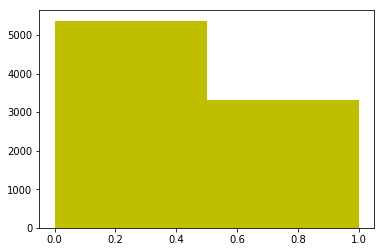

In [29]:
# Showing info if movies are available on Netflix Platform or not (0 = No & 1 = Yes)
plt.hist(netflix, density = False, bins = 2, color = 'y')

5000+ movies are not showing in netflix

(array([4896., 3799.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

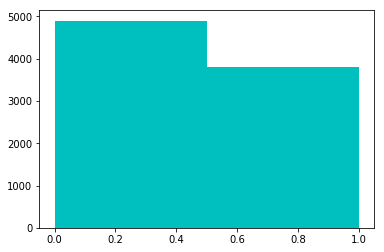

In [30]:
#Showing info if movies are available on Prime Video or not
plt.hist(pvideo, density = False, bins = 2, color = 'c')

4000+ movies are not showing in Prime Video

(array([7876.,  819.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

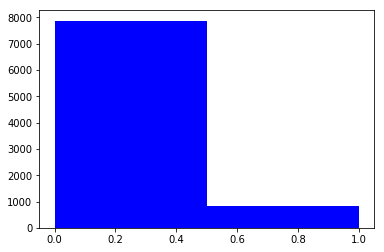

In [31]:
#Showing if movies are available on Disney+ or not
plt.hist(disney, density = False, bins = 2, color = 'b')

7000+ movies are not showing in Disney+

(array([7697.,  998.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

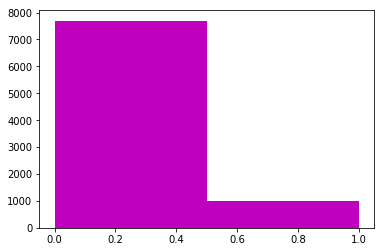

In [32]:
#Showing if movies are available on Hulu platform or not
plt.hist(hulu, density = False, bins = 2, color = 'm')

7000+ movies are not showing in Hulu

(array([8.59877575e-05, 7.63141348e-04, 2.23568169e-03, 1.96696995e-03,
        1.22532554e-03, 2.22493323e-03, 2.99882304e-03, 5.66444352e-03,
        1.53058208e-02, 6.09868170e-02]),
 array([1914. , 1924.7, 1935.4, 1946.1, 1956.8, 1967.5, 1978.2, 1988.9,
        1999.6, 2010.3, 2021. ]),
 <a list of 10 Patch objects>)

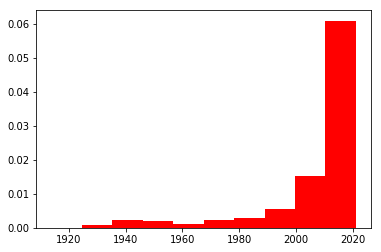

In [33]:
#Showing information regarding how many movies were released over the yearsyear = df['Year']
plt.hist(df1["Year"], density = 1, bins = 10, color = 'r')

Showing information regarding how many movies were released over the years

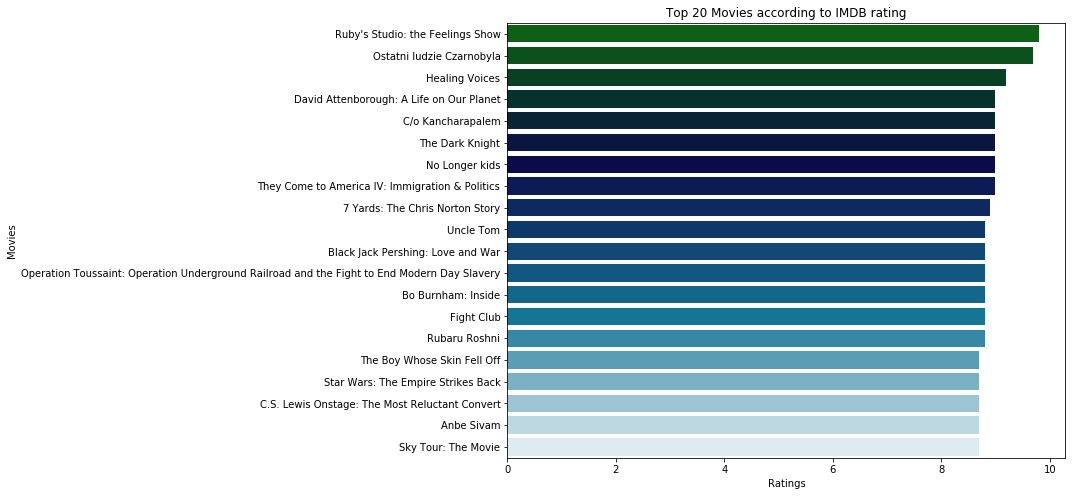

In [34]:
plt.figure(figsize = (10,8))
plt.title("Top 20 Movies according to IMDB rating")
top_20_imdb = df.sort_values(by = "IMDb", ascending = False)[["Title", "IMDb"]][:20]
sns.barplot(data = top_20_imdb, y = "Title", x="IMDb", palette="ocean")
plt.xlabel("Ratings")
plt.ylabel("Movies")
plt.show()

###### Top 20 Movies according to IMDB rating.
###### 'Ruby Studio:the feeling show' is at first position

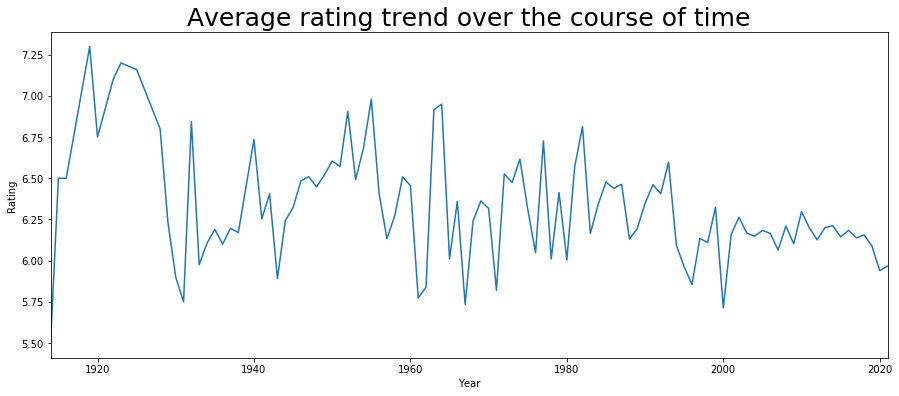

In [35]:
# Track rating year wise
plt.title("Average rating trend over the course of time", size = 25)
_ = df.groupby("Year")["IMDb"].mean().plot(figsize = (15,6))
_ = plt.xlabel("Year")
_ = plt.ylabel("Rating")

Average rating trends of all movies according to year

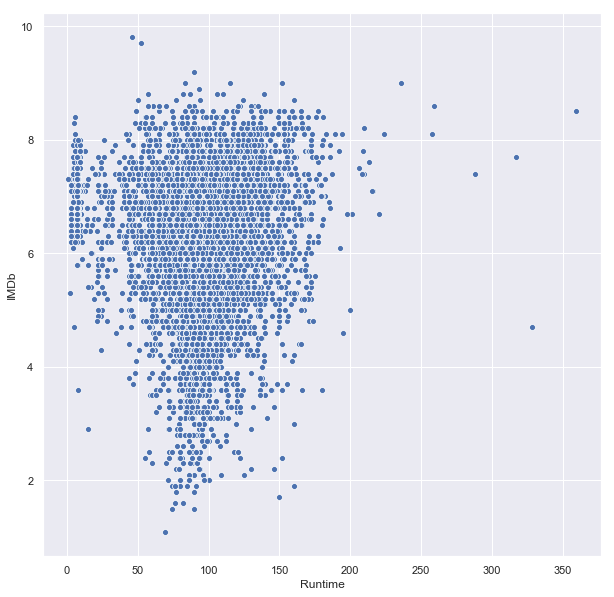

In [36]:
sns.set()
plt.figure(figsize = (10,10))
sns.scatterplot(data =df, y="IMDb", x="Runtime", palette="inferno")
plt.show()

##### IMDb rating based on runtime.
##### Most of films having less than 170 minutes and scattered in range of 2 to 9 IMDb rate

<Figure size 720x720 with 0 Axes>

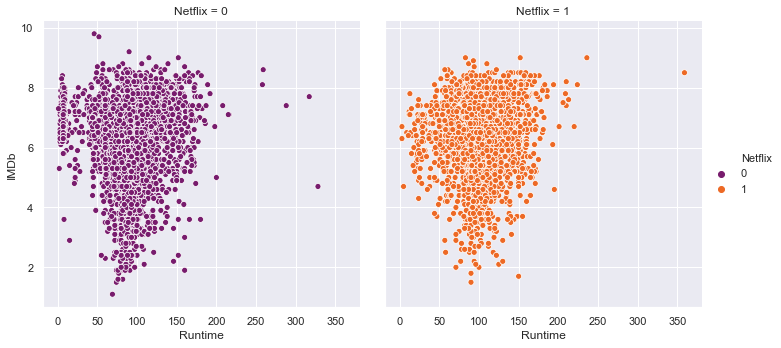

In [37]:
sns.set()
plt.figure(figsize = (10,10))
sns.relplot(data =df, y="IMDb", x="Runtime", col = "Netflix", palette="inferno", hue = "Netflix", kind = "scatter")
plt.show()

##### IMDb rate according to the film runtime, which is present in Netflix or not.
##### In both graph shows with run time less than 200 is most,that is scattered between 2 to 9 IMDb rate

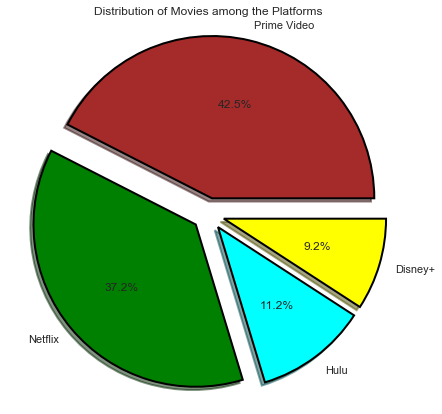

In [38]:
plat_dist = df[["Netflix","Hulu","Prime Video","Disney+"]].sum().sort_values(ascending=False).reset_index()
plat_dist = pd.DataFrame(plat_dist.values, columns=['Platform',"No. of Movies"])
plt.figure(figsize=(7,7))
dt = plat_dist["No. of Movies"]
labels = plat_dist["Platform"]
exp = (0.1,0.1,0.1,0.1)
clr = ( "brown", "green", "cyan", "yellow")
wp = { 'linewidth' : 2, 'edgecolor' : "black" }
plt.pie(dt,labels=labels,autopct='%1.1f%%',explode=exp, colors=clr,shadow=True, wedgeprops=wp)
plt.title('Distribution of Movies among the Platforms')
plt.axis('equal')
plt.show()

##### Graph shows distribution of movies in various platforms.
##### Netflix has 37.2%,Hulu has 11.2%,Prime Video has 42.5%,Disney+ has 9.2%
##### Netflix and Prime Vedio is the popular platform.

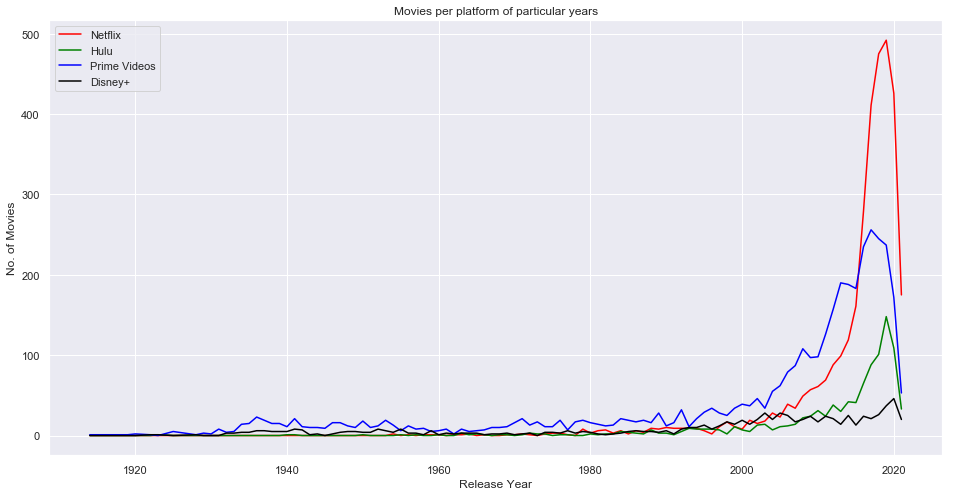

In [39]:
# mpppy => movies per platform per year
mpppy = df.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()
plt.figure(figsize = (16, 8))
sns.lineplot(x=mpppy.index,y=mpppy['Netflix'], color='red', label='Netflix')
sns.lineplot(x=mpppy.index,y=mpppy['Hulu'], color = 'green', label='Hulu')
sns.lineplot(x=mpppy.index,y=mpppy['Prime Video'], color = 'blue', label='Prime Videos')
sns.lineplot(x=mpppy.index,y=mpppy['Disney+'], color = 'black', label='Disney+')
plt.title("Movies per platform of particular years")
plt.legend()
plt.xlabel('Release Year')
plt.ylabel('No. of Movies')
plt.show()

##### The graph shows number of movies released on particular year.
##### In 2020 Most of film are released through online platforms

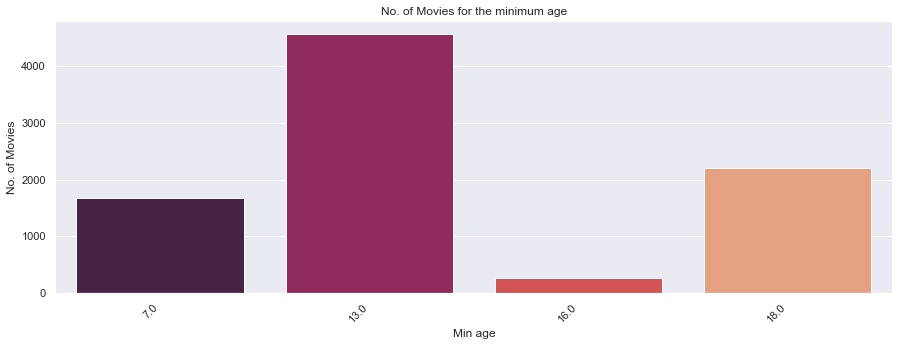

In [40]:
df_age = df.Age.value_counts().reset_index()
df_age = pd.DataFrame(df_age.values, columns = ['Age', "No. of Movies"]).sort_values('No. of Movies',ascending=False)
plt.figure(figsize = (15,5))
ax = sns.barplot(x=df_age["Age"], y= df_age["No. of Movies"], data=df , palette = "rocket")
plt.title ("No. of Movies for the minimum age")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Min age")
plt.ylabel("No. of Movies")
plt.show()

#### the graph shows No. of Movies for the minimum age.
#### The most of films are seen by 13+ age grouos.

# Modeling and Model Fine Tuning

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8695 entries, 0 to 9496
Columns: 320 entries, ID to Country
dtypes: float64(4), int32(4), int64(312)
memory usage: 21.5 MB


In [42]:
data=np.array(df1['IMDb'])
data1=[]
for i in data:
    if 0<=i<3.0:
        data1.append("0")
    if 3.0<=i<5.0:
        data1.append("1")
    if 5.0<=i<8.0:
        data1.append("2")
    if 8.0<=i<9.0:
        data1.append("3")
    if 9.0<=i<10.0:
        data1.append("4")
data1=pd.DataFrame(data1, columns=['Score'])
df1 = pd.concat([df1, data1], axis=1, join='inner')
df1.head()

,ID,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,...,Uruguay,Venezuela,Vietnam,West Germany,Yugoslavia,Zimbabwe,Genres,Language,Country,Score
0,1,2019,18.0,7.8,98.0,1,0,0,0,3811,...,0,0,0,0,0,0,733,266,692,2
1,2,2016,7.0,8.4,97.0,1,0,0,0,4322,...,0,0,0,0,0,0,142,528,317,3
2,3,2020,7.0,9.0,95.0,1,0,0,0,147,...,0,0,0,0,0,0,1034,66,575,4
3,4,2001,7.0,8.1,94.0,1,0,0,0,531,...,0,0,0,0,0,0,1217,528,312,3
5,6,2018,13.0,7.1,94.0,1,0,0,0,5683,...,0,0,0,0,0,0,864,66,692,2


In [43]:
data=np.array(df1['Rotten Tomatoes'])
data1=[]
for i in data:
    if 0<=i<30.0:
        data1.append("0")
    if 30.0<=i<50.0:
        data1.append("1")
    if 50.0<=i<80.0:
        data1.append("2")
    if 80.0<=i<90.0:
        data1.append("3")
    if 90.0<=i<100.0:
        data1.append("4")
data1=pd.DataFrame(data1, columns=['ScoreROTTEN'])
df1 = pd.concat([df1, data1], axis=1, join='inner')
df1.head()


,ID,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,...,Venezuela,Vietnam,West Germany,Yugoslavia,Zimbabwe,Genres,Language,Country,Score,ScoreROTTEN
0,1,2019,18.0,7.8,98.0,1,0,0,0,3811,...,0,0,0,0,0,733,266,692,2,4
1,2,2016,7.0,8.4,97.0,1,0,0,0,4322,...,0,0,0,0,0,142,528,317,3,4
2,3,2020,7.0,9.0,95.0,1,0,0,0,147,...,0,0,0,0,0,1034,66,575,4,4
3,4,2001,7.0,8.1,94.0,1,0,0,0,531,...,0,0,0,0,0,1217,528,312,3,4
5,6,2018,13.0,7.1,94.0,1,0,0,0,5683,...,0,0,0,0,0,864,66,692,2,4


In [44]:
df1.isna().sum()

ID                      0
Year                    0
Age                     0
IMDb                    0
Rotten Tomatoes         0
Netflix                 0
Hulu                    0
Prime Video             0
Disney+                 0
Directors               0
Runtime                 0
Action                  0
Adventure               0
Animation               0
Biography               0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Family                  0
Fantasy                 0
Film-Noir               0
History                 0
Horror                  0
Music                   0
Musical                 0
Mystery                 0
News                    0
Reality-TV              0
Romance                 0
                       ..
Slovenia                0
South Africa            0
South Korea             0
Soviet Union            0
Spain                   0
Sri Lanka               0
Sweden                  0
Switzerland 

In [45]:
x=df1[['Year', 'Netflix', 'Hulu', 'Prime Video', 'Disney+',
       'Directors', 'Genres', 'Country', 'Language', 'Runtime','Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Comedy', 'Western',
       'Animation', 'Family', 'Biography', 'Drama', 'Music', 'War', 'Crime',
       'Fantasy', 'Romance', 'History', 'Mystery', 'Horror', 'Sport',
       'Documentary', 'Musical', 'News', 'Short', 'Reality-TV', 'Film-Noir',
       'Talk-Show']]

y=df1['Score']
y2=df1['ScoreROTTEN']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=22) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.8165760869565217


In [48]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Acuuracy=',accuracy_score(y_pred,y_test),"n_neighbors",n_neighbors-k)

Acuuracy= 0.8172554347826086 n_neighbors 29
Acuuracy= 0.8172554347826086 n_neighbors 28
Acuuracy= 0.8172554347826086 n_neighbors 27
Acuuracy= 0.8172554347826086 n_neighbors 26
Acuuracy= 0.8172554347826086 n_neighbors 25
Acuuracy= 0.8165760869565217 n_neighbors 24
Acuuracy= 0.8172554347826086 n_neighbors 23
Acuuracy= 0.8165760869565217 n_neighbors 22
Acuuracy= 0.8172554347826086 n_neighbors 21
Acuuracy= 0.8165760869565217 n_neighbors 20
Acuuracy= 0.8172554347826086 n_neighbors 19
Acuuracy= 0.8165760869565217 n_neighbors 18
Acuuracy= 0.8152173913043478 n_neighbors 17
Acuuracy= 0.8152173913043478 n_neighbors 16
Acuuracy= 0.813858695652174 n_neighbors 15
Acuuracy= 0.8125 n_neighbors 14
Acuuracy= 0.813858695652174 n_neighbors 13
Acuuracy= 0.8145380434782609 n_neighbors 12
Acuuracy= 0.8104619565217391 n_neighbors 11
Acuuracy= 0.8104619565217391 n_neighbors 10
Acuuracy= 0.8131793478260869 n_neighbors 9
Acuuracy= 0.8077445652173914 n_neighbors 8
Acuuracy= 0.8057065217391305 n_neighbors 7
Acuur

In [49]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6908967391304348


In [50]:
print("accuracy is :",accuracy_score(y_test,y_pred))

accuracy is : 0.6908967391304348


In [51]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics
max=0 
for i in range(1,40):
  clf=RandomForestClassifier(n_estimators=i)  #Creating a random forest with 100 decision trees
  clf.fit(x_train, y_train)  #Training our model
  y_pred=clf.predict(x_test) #testing our model
  if ( max < metrics.accuracy_score(y_test, y_pred)):
    max=metrics.accuracy_score(y_test, y_pred)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred)," i= ",i) 

Accuracy: 0.673233695652174  i=  1
Accuracy: 0.6317934782608695  i=  2
Accuracy: 0.7282608695652174  i=  3
Accuracy: 0.7384510869565217  i=  4
Accuracy: 0.7758152173913043  i=  5
Accuracy: 0.764266304347826  i=  6
Accuracy: 0.7778532608695652  i=  7
Accuracy: 0.7730978260869565  i=  8
Accuracy: 0.7914402173913043  i=  9
Accuracy: 0.7832880434782609  i=  10
Accuracy: 0.7995923913043478  i=  11
Accuracy: 0.7934782608695652  i=  12
Accuracy: 0.7975543478260869  i=  13
Accuracy: 0.7961956521739131  i=  14
Accuracy: 0.7941576086956522  i=  15
Accuracy: 0.7975543478260869  i=  16
Accuracy: 0.7989130434782609  i=  17
Accuracy: 0.7961956521739131  i=  18
Accuracy: 0.8063858695652174  i=  19
Accuracy: 0.7921195652173914  i=  20
Accuracy: 0.7961956521739131  i=  21
Accuracy: 0.7975543478260869  i=  22
Accuracy: 0.8029891304347826  i=  23
Accuracy: 0.8016304347826086  i=  24
Accuracy: 0.8043478260869565  i=  25
Accuracy: 0.8036684782608695  i=  26
Accuracy: 0.8023097826086957  i=  27
Accuracy: 0.

In [52]:
print(max)

0.8063858695652174


### KNN is the best model with Accuracy=  0.8172554347826086  and n_neighbor= 29

In [53]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train,y_train)
X_test_scaled = scaler.transform(x_test)
y_pred = knn.predict(X_test_scaled)
print('Acuuracy=',accuracy_score(y_pred,y_test))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


Acuuracy= 0.8172554347826086
